In [28]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

load model



In [29]:
model_path = '/Users/zayn/Desktop/CS415G/Traffic-Sign-Classification/zz/sf_model.h5'
model = load_model(model_path)

load the video



In [30]:
video_path = '/Users/zayn/Desktop/CS415G/Traffic-Sign-Classification/zz/clip_1.MOV'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

[ WARN:0@142.582] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@142.582] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin3 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@142.582] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@142.582] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/video

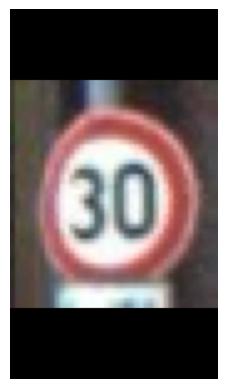

In [31]:
fps = cap.get(cv2.CAP_PROP_FPS)

# the first fps
ret, frame = cap.read()

# make sure it works
if not ret:
    print("Error: Could not read frame.")
    cap.release()
    exit()

# show the first fps
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
# set the input size
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3  # RGB

In [33]:
# Label Overview
labels_dict = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

1/1 [==============================] - 0s 82ms/step


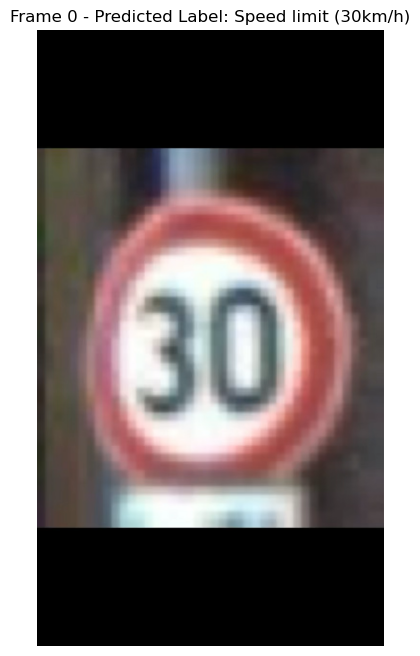

1/1 [==============================] - 0s 13ms/step


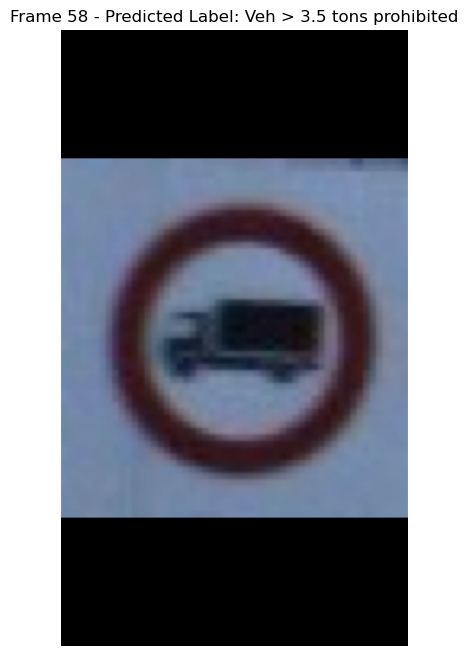

1/1 [==============================] - 0s 11ms/step


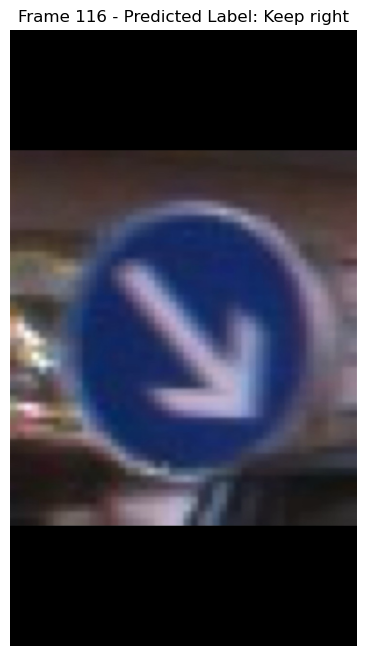

1/1 [==============================] - 0s 12ms/step


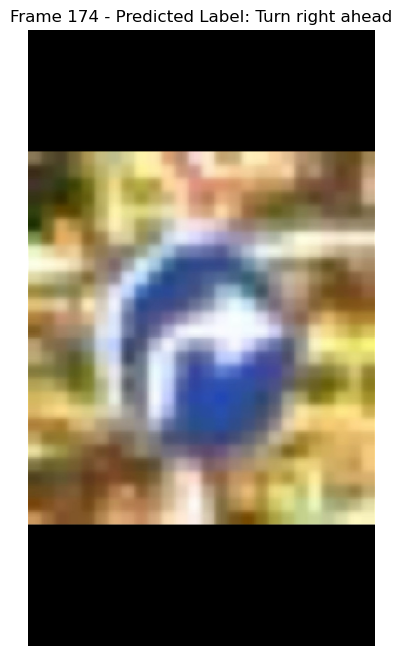

1/1 [==============================] - 0s 11ms/step


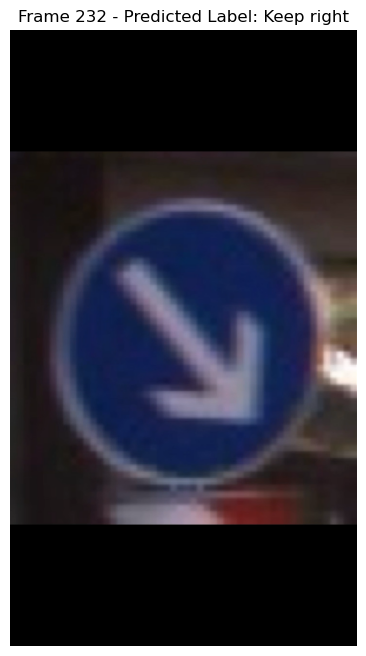

1/1 [==============================] - 0s 13ms/step


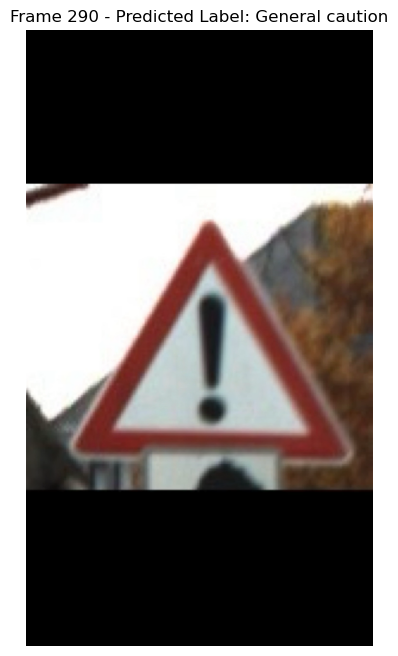

1/1 [==============================] - 0s 11ms/step


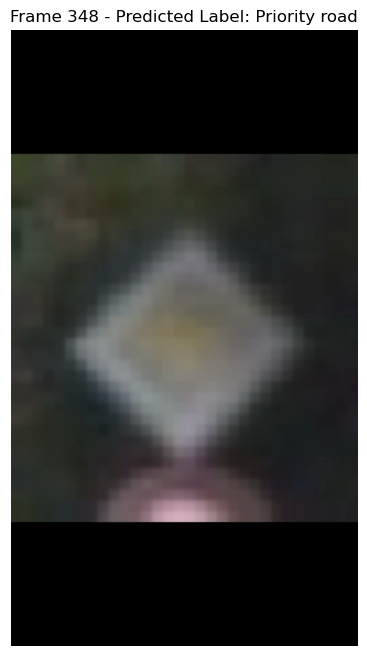

1/1 [==============================] - 0s 11ms/step


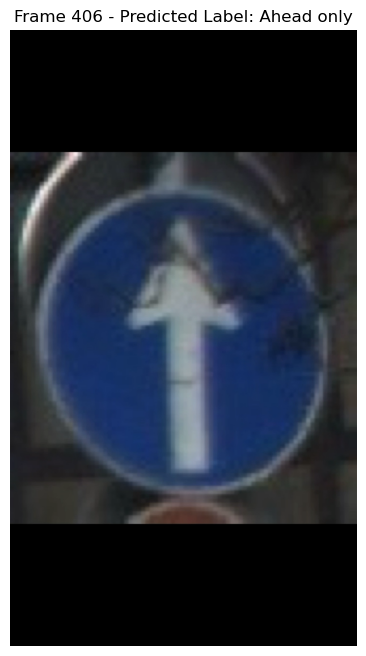

1/1 [==============================] - 0s 12ms/step


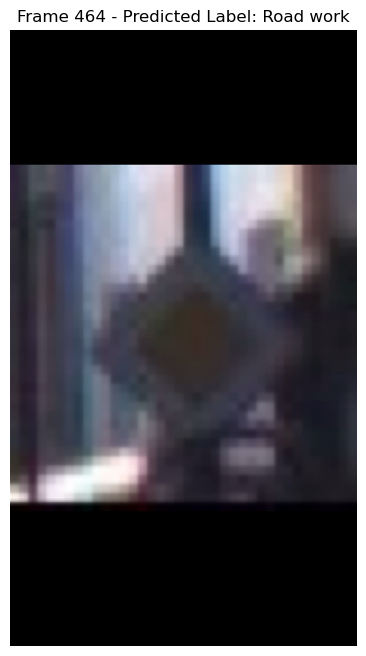

In [34]:
# To get the fps
fps = 2*int(cap.get(cv2.CAP_PROP_FPS))

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Extract one frame per second as a key frame
    if frame_count % fps == 0:
        # Preprocess the frame to meet the model input requirements
        processed_frame = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
        processed_frame = processed_frame / 255.0
        processed_frame = np.expand_dims(processed_frame, axis=0)

        # Use the model for prediction
        prediction = model.predict(processed_frame)
        predicted_class = np.argmax(prediction, axis=1)
        predicted_label = labels_dict[predicted_class[0]]  # Get the label from the dictionary

        # Use matplotlib to visualize the result
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f'Frame {frame_count} - Predicted Label: {predicted_label}')  # Show label text
        plt.axis('off')
        plt.show()

    frame_count += 1

# Release video resources
cap.release()